## 1. Загрузить файл [data_breast.csv](https://github.com/netology-code/data-scientist4/blob/master/3.%20Python%20Preprocessing/Python%20Preprocessing%20-%20Project%20Work/data_breast.csv). В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на [сайте](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import stats
%matplotlib inline
import statistics
import seaborn as sns
df=pd.read_csv("data_breast.csv")

import os
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

In [2]:
df=pd.read_csv("data_breast.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Сразу заменим обозначение злокачественной опухоли M на 1, доброкачественной на 0

In [4]:
df['diagnosis']=df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

## 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [5]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# MODA
df.select_dtypes(include=[np.number]).iloc[:,1:].mode()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,0.0,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,...,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427,NaN
1,NaN,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,...,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN,NaN
2,NaN,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,...,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN,NaN
3,NaN,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,...,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN,NaN
4,NaN,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,...,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN,NaN
5,NaN,NaN,18.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,489.5,0.1312,NaN,NaN,NaN,0.3196,NaN,NaN
6,NaN,NaN,18.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,546.7,0.1347,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,19.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,547.4,0.1401,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,624.1,0.1415,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,698.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# 33 признака, 569 строк
df.shape

(569, 33)

In [8]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## 3. Выбрать стратегию для работы с пропущенными значениями.

In [9]:
## Колонки содержащие пустые значения
df.columns[df.isna().any()].tolist()

['Unnamed: 32']

In [10]:
df[df.columns[df.isna().any()]].dtypes

Unnamed: 32    float64
dtype: object

In [11]:
df['Unnamed: 32'].value_counts()

Series([], Name: Unnamed: 32, dtype: int64)

Пустой столбец образовался из-за лишней запятой, его нужно удалить. Других пропусков данных нет.

In [12]:
del df['Unnamed: 32']
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 4. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [13]:
corr = df.corr()

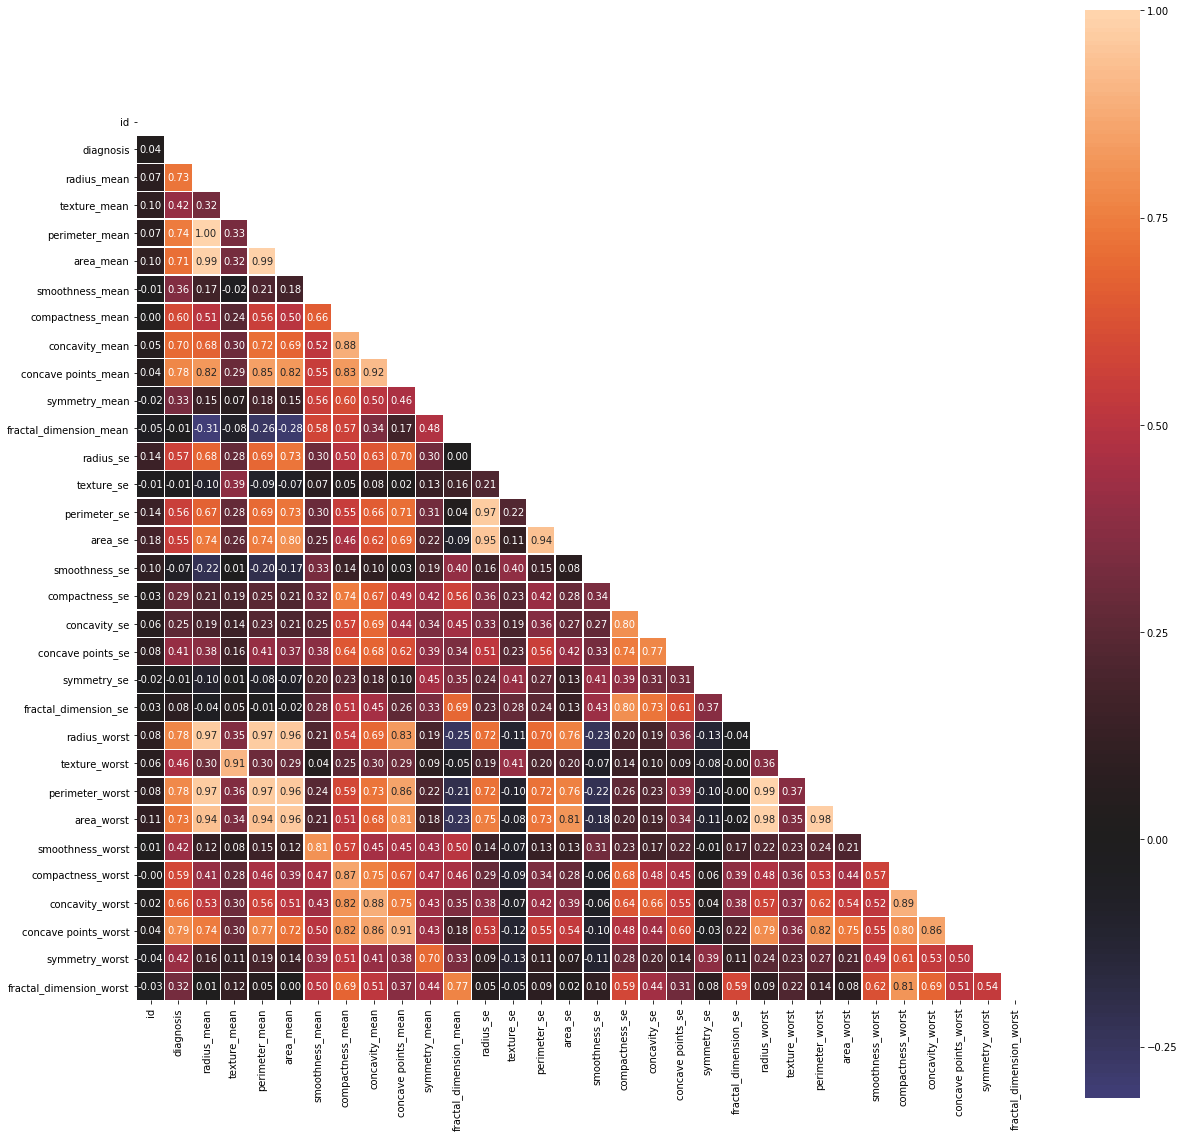

In [14]:

%config InlineBackend.figure_format = 'png'
plt.figure(figsize=(20,20))
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5);

#sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
#fig=plt.gcf()
#fig.set_size_inches(20,20)
#plt.show()

## 5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

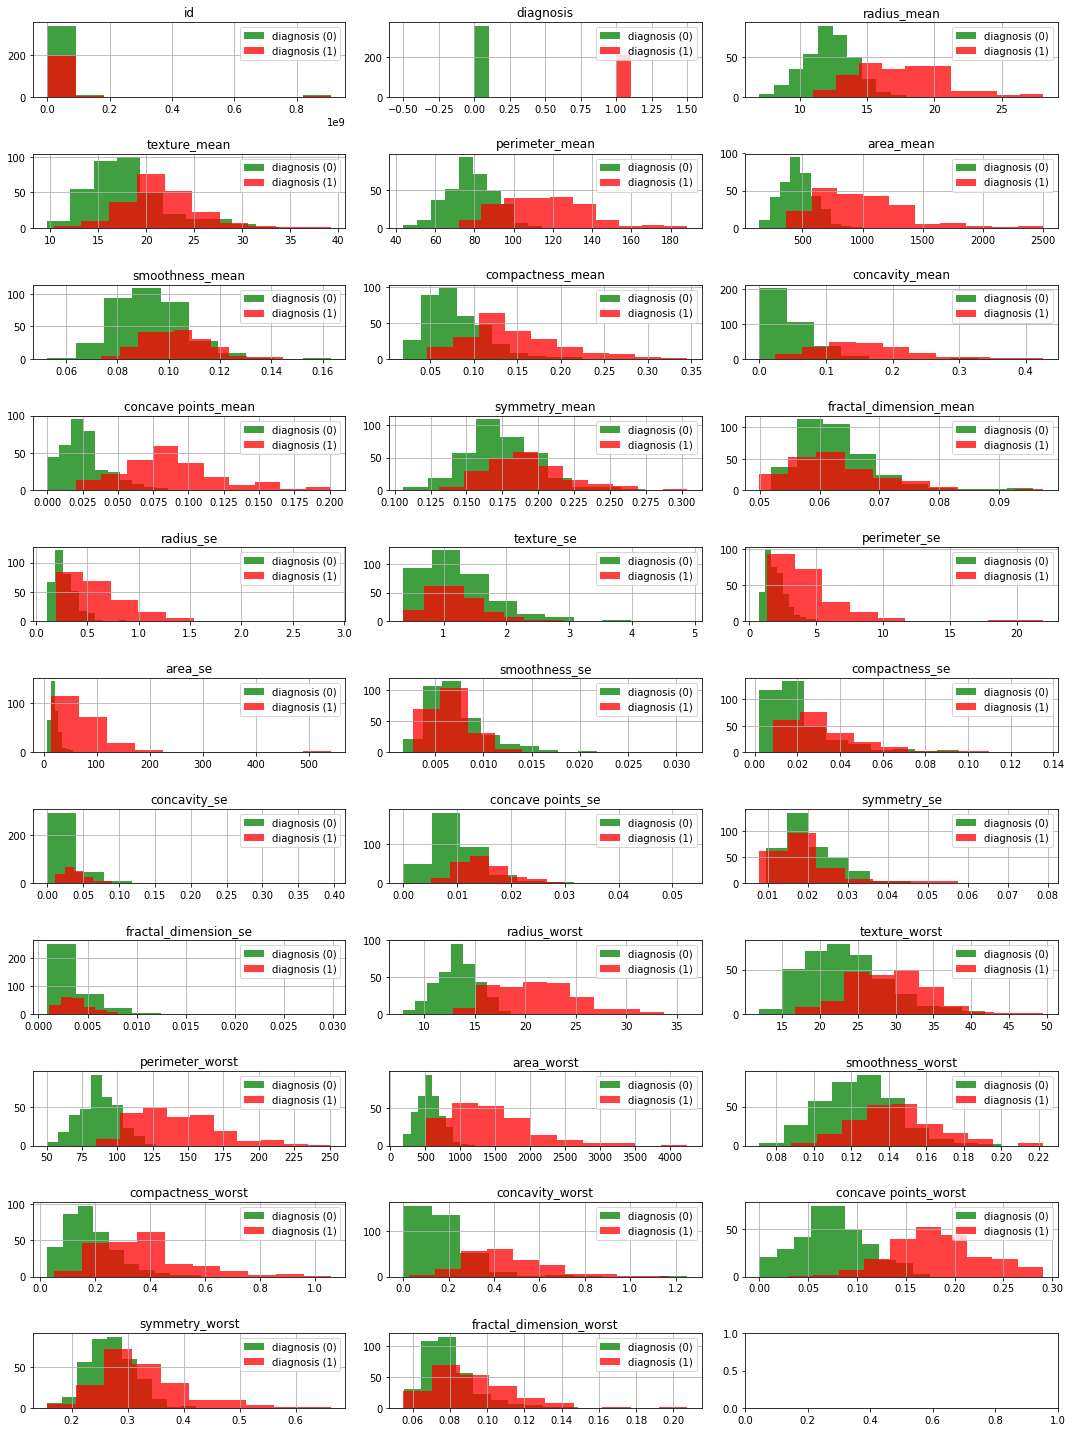

In [15]:
# Совместно
df1=df.loc[df['diagnosis']==0]
df2=df.loc[df['diagnosis']==1]
fig, ax  =  plt.subplots(11,3, figsize=(15,20))
for col,axis in zip(df.select_dtypes(include=[np.number]).columns[0:],[i for i in ax.flat]):
    df1.hist(column=col,ax=axis,alpha=0.75,color='green',label='diagnosis (0)')
    df2.hist \
    (column=col,ax=axis,alpha=0.75,color='red',label='diagnosis (1)') 
    axis.legend(loc="upper right")
plt.tight_layout()
plt.show()

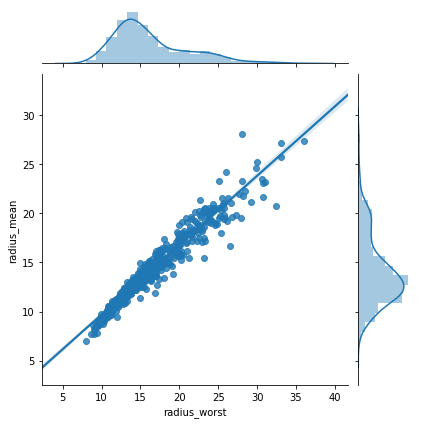

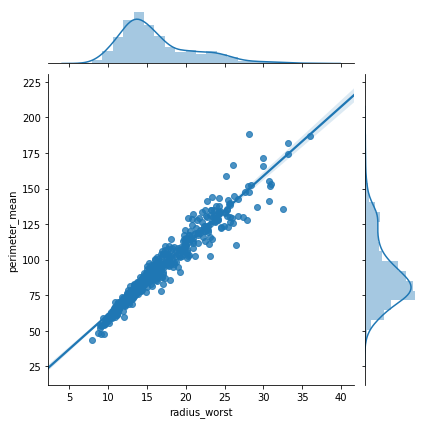

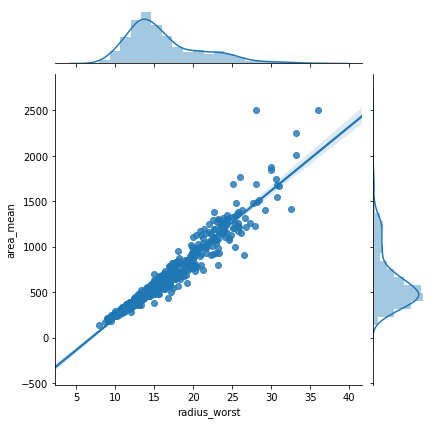

In [16]:
g = sns.jointplot(x=df['radius_worst'], y=df['radius_mean'], data=df, kind='reg')
g = sns.jointplot(x=df['radius_worst'], y=df['perimeter_mean'], data=df, kind='reg')
g = sns.jointplot(x=df['radius_worst'], y=df['area_mean'], data=df, kind='reg')

## 6. С помощью статистических методов проверить взаимосвязи между переменными.

In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

print(stats.mannwhitneyu(pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df['radius_worst'])))[0], pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df['radius_mean'])))[0]))
print(stats.mannwhitneyu(pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df['radius_worst'])))[0], pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df['perimeter_mean'])))[0]))


MannwhitneyuResult(statistic=131446.5, pvalue=2.0101946362289514e-08)
MannwhitneyuResult(statistic=135171.5, pvalue=7.250458155476692e-07)


## 7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?

Соотношение признаков к объёму данных 17,2 - это довольно низкий показатель, генерировать новые признаки без сокращения имеющихся точно нет смысла. Оптимальный способ сокращения признаков - обёрточный. Например рекурсивное исключение признаков. Постороим модели. После построение начнём исключать признаки.

## 8. Рассчитать Feature Selection для выбранных переменных.

В данном случае можно попробовать удалить вычисляемые переменные (compactness) и сильно коррелирующие переменные. Однако, на этапе feature importances удаление этих переменных не сказалось на модели.

## 9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” протестировав как минимум 2 алгоритма. Использовать те алгоритмы, которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [19]:
data = df.drop(columns=['id']).copy(deep=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
y = data['diagnosis'].copy()
X = data.drop('diagnosis',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_logreg_train = logreg.predict_proba(X_train)[:, 1]
y_pred_logreg_test = logreg.predict_proba(X_test)[:, 1]


roc_auc_train = np.round(roc_auc_score(y_train, y_pred_logreg_train),2)
roc_auc_test = np.round(roc_auc_score(y_test, y_pred_logreg_test),2)

print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

C:\Users\Exoulum\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train:  0.99
Test:  1.0


In [23]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred_clf_test = clf.predict_proba(X_test)[:, 1]
y_pred_clf_train = clf.predict_proba(X_train)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_pred_logreg_test),2)
roc_auc_train = np.round(roc_auc_score(y_train, y_pred_logreg_train),2)

print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

C:\Users\Exoulum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train:  0.99
Test:  1.0


## 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [24]:
accuracy_log = accuracy_score(y_test,y_pred_logreg_test.round())
f1_score_log = f1_score(y_test,y_pred_logreg_test.round())
precision_score_log = precision_score(y_test,y_pred_logreg_test.round())
recall_score_log = recall_score(y_test,y_pred_logreg_test.round())
print(f'Accuracy: {accuracy_log:.2f}')
print(f'F1_Score: {f1_score_log:.2f}')
print(f'Precision_Score: {precision_score_log:.2f}')
print(f'Recall_Score: {recall_score_log:.2f}')

Accuracy: 0.96
F1_Score: 0.95
Precision_Score: 0.97
Recall_Score: 0.94


In [25]:
accuracy_log = accuracy_score(y_test,y_pred_clf_test.round())
f1_score_log = f1_score(y_test,y_pred_clf_test.round())
precision_score_log = precision_score(y_test,y_pred_clf_test.round())
recall_score_log = recall_score(y_test,y_pred_clf_test.round())
print(f'Accuracy: {accuracy_log:.2f}')
print(f'F1_Score: {f1_score_log:.2f}')
print(f'Precision_Score: {precision_score_log:.2f}')
print(f'Recall_Score: {recall_score_log:.2f}')

Accuracy: 0.97
F1_Score: 0.96
Precision_Score: 0.98
Recall_Score: 0.94


## 8. Рассчитать Feature Selection для выбранных переменных.

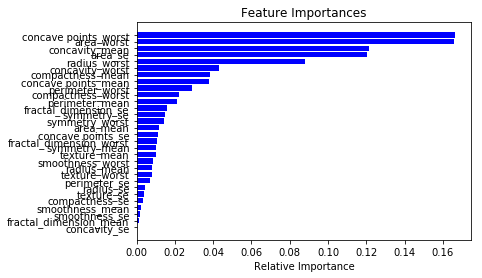

In [26]:
features = X_train.columns
importances = clf.feature_importances_

indices = np.argsort(importances)[:30]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [27]:
[features[i] for i in indices]

['concavity_se',
 'fractal_dimension_mean',
 'smoothness_se',
 'smoothness_mean',
 'compactness_se',
 'texture_se',
 'radius_se',
 'perimeter_se',
 'texture_worst',
 'radius_mean',
 'smoothness_worst',
 'texture_mean',
 'symmetry_mean',
 'fractal_dimension_worst',
 'concave points_se',
 'area_mean',
 'symmetry_worst',
 'symmetry_se',
 'fractal_dimension_se',
 'perimeter_mean',
 'compactness_worst',
 'perimeter_worst',
 'concave points_mean',
 'compactness_mean',
 'concavity_worst',
 'radius_worst',
 'area_se',
 'concavity_mean',
 'area_worst',
 'concave points_worst']

Сократим размерность - удалим все параметры с важностью менее 0.05

In [28]:
y = data['diagnosis'].copy()
X = data.drop(columns=['diagnosis',
 'fractal_dimension_se',
 'radius_se',
 'compactness_se',
 'texture_se',
 'symmetry_mean',
 'compactness_mean',
 'smoothness_mean',
 'fractal_dimension_worst',
 'concavity_se',
 'symmetry_se',
 'concave points_se',
 'smoothness_worst',
 'smoothness_se',
 'compactness_worst',
 'texture_worst',
 'perimeter_se',
 'area_mean',
 'radius_worst',
 'concavity_worst',
 'fractal_dimension_mean',
 'symmetry_worst',
 'texture_mean',
 'area_worst',
 'concave points_worst'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred_clf_test = clf.predict_proba(X_test)[:, 1]
y_pred_clf_train = clf.predict_proba(X_train)[:, 1]
roc_auc_test = np.round(roc_auc_score(y_test, y_pred_logreg_test),2)
roc_auc_train = np.round(roc_auc_score(y_train, y_pred_logreg_train),2)

print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.99
Test:  1.0


C:\Users\Exoulum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
accuracy_log = accuracy_score(y_test,y_pred_clf_test.round())
f1_score_log = f1_score(y_test,y_pred_clf_test.round())
precision_score_log = precision_score(y_test,y_pred_clf_test.round())
recall_score_log = recall_score(y_test,y_pred_clf_test.round())
print(f'Accuracy: {accuracy_log:.2f}')
print(f'F1_Score: {f1_score_log:.2f}')
print(f'Precision_Score: {precision_score_log:.2f}')
print(f'Recall_Score: {recall_score_log:.2f}')

Accuracy: 0.96
F1_Score: 0.94
Precision_Score: 0.97
Recall_Score: 0.92


Сравним с предыдущими параметрами качества:

Accuracy: 0.98

F1_Score: 0.97

Precision_Score: 0.98

Recall_Score: 0.95

Модель потеряла в качекстве.

# Вывод
В работе удалось с высокой точностью предскать значение целевого параметра. При необходимости есть возможность сократить размерность с невысокой потерей качества для ускорения обучения.

## 11. Загрузить результат в формате .ipynb ноутбука в репозиторий, ссылку добавить в личный кабинет